=== Dataset Shape ===
(10000, 10)

=== Dataset Info ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Farm_ID               10000 non-null  int64  
 1   Soil_pH               10000 non-null  float64
 2   Soil_Moisture         10000 non-null  float64
 3   Temperature_C         10000 non-null  float64
 4   Rainfall_mm           10000 non-null  float64
 5   Crop_Type             10000 non-null  object 
 6   Fertilizer_Usage_kg   10000 non-null  float64
 7   Pesticide_Usage_kg    10000 non-null  float64
 8   Crop_Yield_ton        10000 non-null  float64
 9   Sustainability_Score  10000 non-null  float64
dtypes: float64(8), int64(1), object(1)
memory usage: 781.4+ KB
None

=== First 5 Rows ===
   Farm_ID   Soil_pH  Soil_Moisture  Temperature_C  Rainfall_mm Crop_Type  \
0        1  7.073643      49.145359      26.668157   227

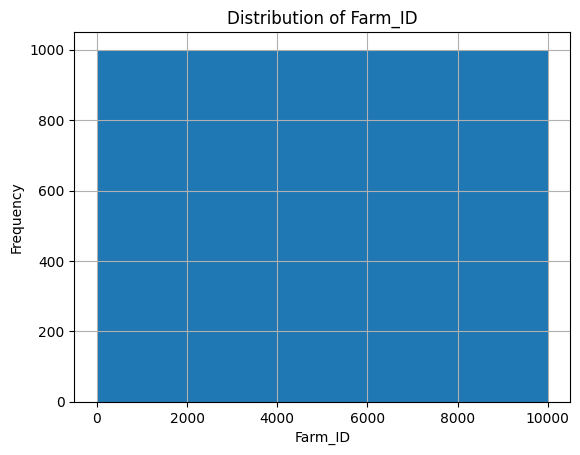

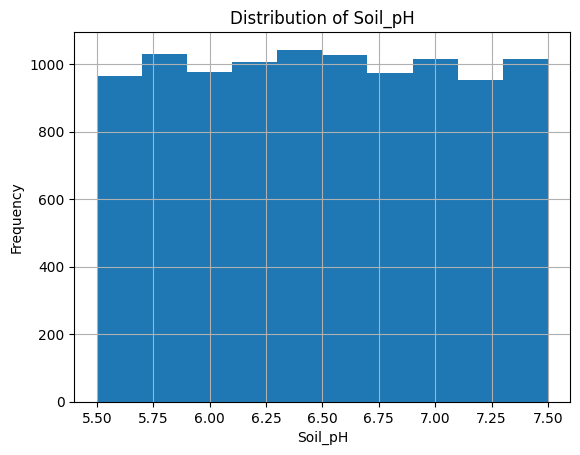

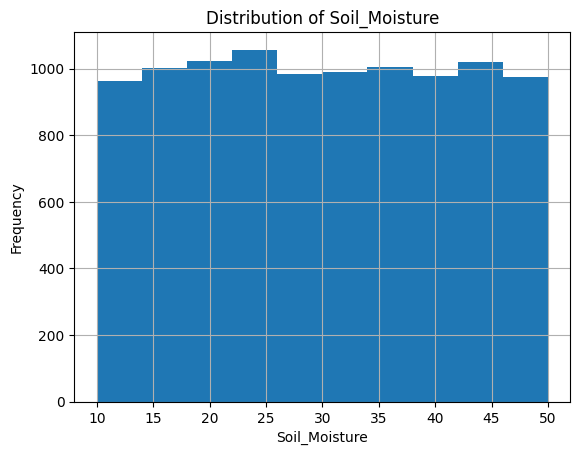

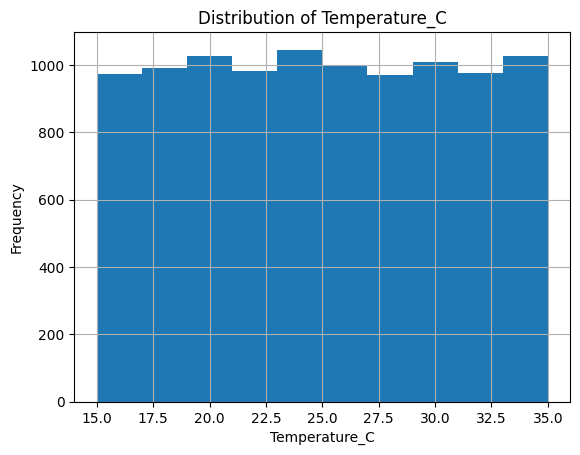

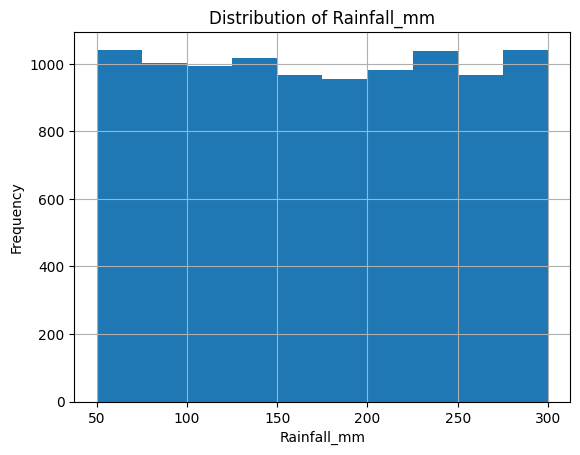

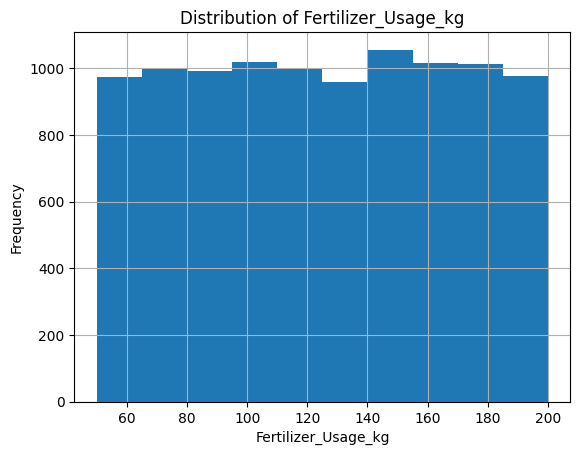

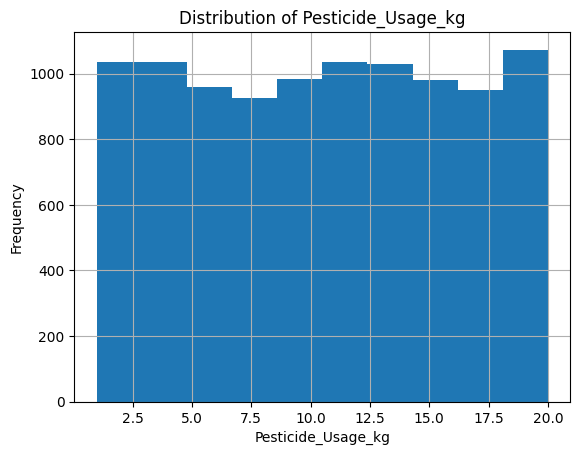

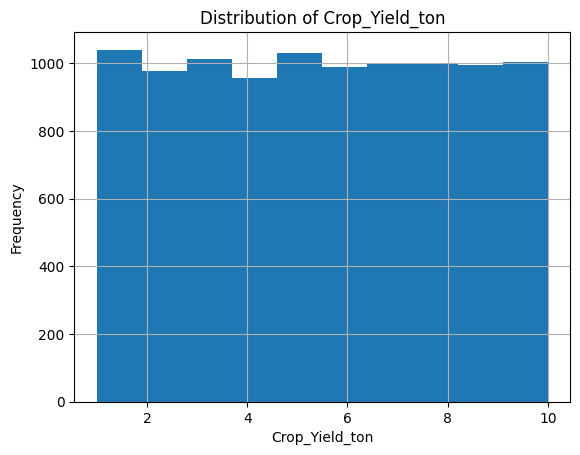

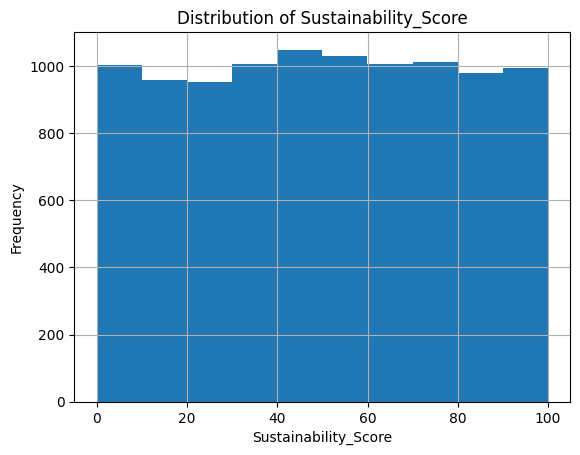

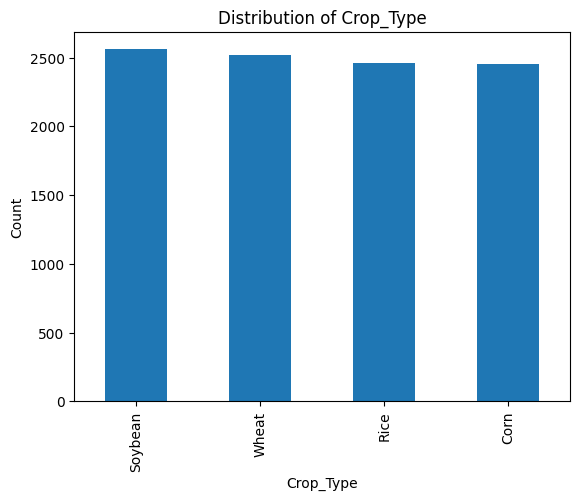


=== Missing Values After Cleaning ===
Farm_ID                 0
Soil_pH                 0
Soil_Moisture           0
Temperature_C           0
Rainfall_mm             0
Crop_Type               0
Fertilizer_Usage_kg     0
Pesticide_Usage_kg      0
Crop_Yield_ton          0
Sustainability_Score    0
dtype: int64

=== Dataset After Encoding ===
   Farm_ID   Soil_pH  Soil_Moisture  Temperature_C  Rainfall_mm  \
0        1  7.073643      49.145359      26.668157   227.890912   
1        2  6.236931      21.496115      29.325342   244.017493   
2        3  5.922335      19.469042      17.666414   141.110521   
3        4  6.845120      27.974234      17.188722   156.785663   
4        5  6.934171      33.637679      23.603899    77.859362   

   Fertilizer_Usage_kg  Pesticide_Usage_kg  Crop_Yield_ton  \
0           131.692844            2.958215        1.576920   
1           136.370492           19.204770        3.824686   
2            99.725210           11.041066        1.133198   
3    

In [ ]:
# @title Explanatory Data Analysis (EDA)
# Data Understanding & Preprocessing with Visualisation
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset
file_path = "/content/farmer_advisor_dataset.csv"
df = pd.read_csv(file_path)

# 1. Basic Data Understanding
print("=== Dataset Shape ===")
print(df.shape)

print("\n=== Dataset Info ===")
print(df.info())

print("\n=== First 5 Rows ===")
print(df.head())

print("\n=== Summary Statistics ===")
print(df.describe(include="all"))

# 2. Missing Values Analysis
print("\n=== Missing Values ===")
print(df.isnull().sum())

# 3. Target Variable Distribution (if exists)
if "Crop" in df.columns:
    plt.figure()
    df["Crop"].value_counts().plot(kind="bar")
    plt.title("Crop Distribution")
    plt.xlabel("Crop")
    plt.ylabel("Count")
    plt.show()

# 4. Numerical Feature Distributions
numerical_cols = df.select_dtypes(include=["int64", "float64"]).columns

for col in numerical_cols:
    plt.figure()
    df[col].hist()
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.show()

# 5. Categorical Feature Analysis
categorical_cols = df.select_dtypes(include=["object"]).columns

for col in categorical_cols:
    plt.figure()
    df[col].value_counts().plot(kind="bar")
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.show()

# 6. Data Preprocessing
# Handle missing values
df_cleaned = df.copy()

for col in numerical_cols:
    df_cleaned[col] = df_cleaned[col].fillna(df_cleaned[col].median())

for col in categorical_cols:
    df_cleaned[col] = df_cleaned[col].fillna(df_cleaned[col].mode()[0])

print("\n=== Missing Values After Cleaning ===")
print(df_cleaned.isnull().sum())

# 7. Encoding Categorical Variables
df_encoded = pd.get_dummies(df_cleaned, drop_first=True)

print("\n=== Dataset After Encoding ===")
print(df_encoded.head())

# Save the preprocessed dataset to a new CSV file
df_encoded.to_csv("/content/farmer_advisor_dataset_preprocessed.csv", index=False)




In [ ]:
# @title Data Splitting
from sklearn.model_selection import train_test_split
import pandas as pd

# 1. Define the correct target column
target_col = 'Sustainability_Score'

# 2. Define Features (X) and Target (y)
# Dropping the target and the non-predictive Farm_ID
X = df_cleaned.drop([target_col, 'Farm_ID'], axis=1)
y = df_cleaned[target_col]

# 3. Encode categorical features in X (like Crop_Type)
# This converts names like 'Rice' into numbers the model can understand
X_encoded = pd.get_dummies(X, drop_first=True)

# 4. Split the data 80/20
X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y,
    test_size=0.3,
    random_state=42
)

print("Success!")
print(f"Training samples: {X_train.shape[0]}")
print(f"Testing samples: {X_test.shape[0]}")

Success!
Training samples: 7000
Testing samples: 3000


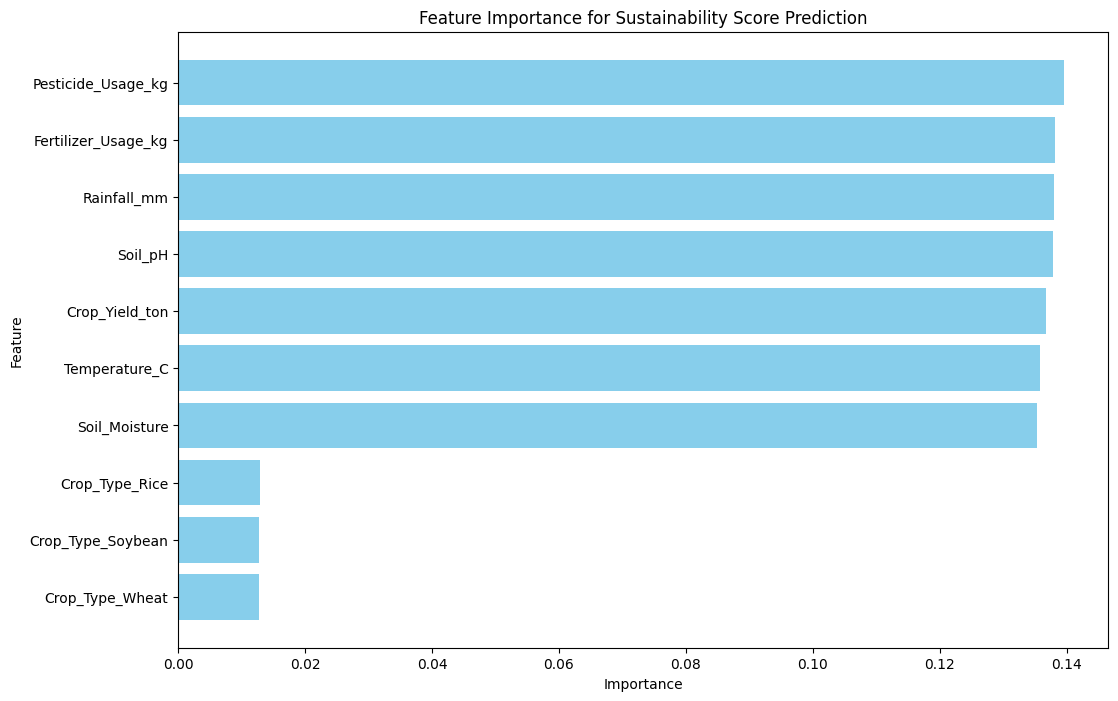

In [ ]:
# @title Feature Importance
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.ensemble import GradientBoostingRegressor # Changed to GradientBoostingRegressor

# Re-train a GradientBoostingRegressor to get feature importances for 'Sustainability_Score'
# (assuming X_train and y_train are already updated for 'Sustainability_Score' from previous step)
gbr_model_for_importance = GradientBoostingRegressor(n_estimators=100, random_state=42) # Changed model
gbr_model_for_importance.fit(X_train, y_train)

# Get feature importances from the trained GradientBoostingRegressor model
feature_importances = gbr_model_for_importance.feature_importances_

# Get the feature names from the training data
feature_names = X_train.columns

# Create a DataFrame for better organization and sorting
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
})

# Sort features by importance in descending order
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Visualize the feature importances
plt.figure(figsize=(12, 8))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance for Sustainability Score Prediction (Gradient Boosting)') # title updated
plt.gca().invert_yaxis() # To display the most important feature at the top
plt.show()

In [ ]:
top_5_features = importance_df['Feature'].head(5).tolist()
print("Top 5 Most Important Features:")
print(top_5_features)

Top 5 Most Important Features:
['Pesticide_Usage_kg', 'Fertilizer_Usage_kg', 'Rainfall_mm', 'Soil_pH', 'Crop_Yield_ton']


In [ ]:
X_train_selected = X_train[top_5_features]
X_test_selected = X_test[top_5_features]

print("Shape of X_train_selected:", X_train_selected.shape)
print("Shape of X_test_selected:", X_test_selected.shape)
print("Features used for training:", X_train_selected.columns.tolist())

Shape of X_train_selected: (7000, 5)
Shape of X_test_selected: (3000, 5)
Features used for training: ['Pesticide_Usage_kg', 'Fertilizer_Usage_kg', 'Rainfall_mm', 'Soil_pH', 'Crop_Yield_ton']


In [ ]:
# @title K-Nearest Neighbour (KNN)
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

scaler_knn = StandardScaler()
X_train_knn = scaler_knn.fit_transform(X_train_selected)
X_test_knn = scaler_knn.transform(X_test_selected)

knn_model = KNeighborsRegressor(
    n_neighbors=5,       # common, safe default
    weights="distance"   # improves regression performance
)

knn_model.fit(X_train_knn, y_train)

y_pred_knn = knn_model.predict(X_test_knn)

# Metrics
mae_knn = mean_absolute_error(y_test, y_pred_knn)
rmse_knn = np.sqrt(mean_squared_error(y_test, y_pred_knn))
r2_knn = r2_score(y_test, y_pred_knn)

print("=== KNN Regressor Performance (Top 5 Features for Sustainability Score) ===")
print(f"Mean Absolute Error (MAE): {mae_knn:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_knn:.2f}")
print(f"R-squared Score (R2): {r2_knn:.2f}")


=== KNN Regressor Performance (Top 5 Features for Sustainability Score) ===
Mean Absolute Error (MAE): 26.21
Root Mean Squared Error (RMSE): 31.21
R-squared Score (R2): -0.18


In [ ]:
# @title Feedforward Neural Network (FNN)
import tensorflow as tf
from tensorflow import keras
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Scale the features for the FNN model
scaler_fnn = StandardScaler()
X_train_fnn = scaler_fnn.fit_transform(X_train_selected)
X_test_fnn = scaler_fnn.transform(X_test_selected)

# Define the FNN model
model = keras.Sequential([
    keras.layers.Dense(128, activation='relu', input_shape=(X_train_fnn.shape[1],)),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(1) # Output layer for regression
])

# Compile the model
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Train the model
history = model.fit(
    X_train_fnn, y_train,
    epochs=100, # You can adjust the number of epochs
    batch_size=32,
    validation_split=0.2, # Use 20% of training data for validation
    verbose=0 # Set to 1 or 2 for more verbose output during training
)

# Make predictions on the test set
y_pred_fnn = model.predict(X_test_fnn).flatten()

# Calculate metrics for FNN
mae_fnn = mean_absolute_error(y_test, y_pred_fnn)
mse_fnn = mean_squared_error(y_test, y_pred_fnn)
rmse_fnn = np.sqrt(mse_fnn)
r2_fnn = r2_score(y_test, y_pred_fnn)

print("=== FNN Model Performance (Top 5 Features for Sustainability Score) ===")
print(f"Mean Absolute Error (MAE): {mae_fnn:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_fnn:.2f}")
print(f"R-squared Score (R2): {r2_fnn:.3f}")


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
=== FNN Model Performance (Top 5 Features for Sustainability Score) ===
Mean Absolute Error (MAE): 24.81
Root Mean Squared Error (RMSE): 28.81
R-squared Score (R2): -0.009


In [ ]:
# @title Random Forest (RF)
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Initialize the RandomForestRegressor model with the same parameters as before
rf_model_selected = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model using the selected top 5 features
rf_model_selected.fit(X_train_selected, y_train)

# Make predictions on the test set using the selected features
y_pred_selected_rf = rf_model_selected.predict(X_test_selected)

# Calculate metrics for RandomForestRegressor with selected features
mae_rf_selected = mean_absolute_error(y_test, y_pred_selected_rf)
mse_rf_selected = mean_squared_error(y_test, y_pred_selected_rf)
rmse_rf_selected = np.sqrt(mse_rf_selected)
r2_rf_selected = r2_score(y_test, y_pred_selected_rf)

print("=== RandomForestRegressor Performance (Top 5 Features for Sustainability Score) ===") # CHANGED title
print(f"Mean Absolute Error (MAE): {mae_rf_selected:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_rf_selected:.2f}")
print(f"R-squared Score (R2): {r2_rf_selected:.2f}")

=== RandomForestRegressor Performance (Top 5 Features for Sustainability Score) ===
Mean Absolute Error (MAE): 24.99
Root Mean Squared Error (RMSE): 29.26
R-squared Score (R2): -0.04


In [ ]:
# @title Gradient Boosting (GB)
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Initialize the GradientBoostingRegressor model
gbr_model_selected = GradientBoostingRegressor(random_state=42)

# Train the model using the selected top 5 features
gbr_model_selected.fit(X_train_selected, y_train)

# Make predictions on the test set using the selected features
y_pred_selected_gbr = gbr_model_selected.predict(X_test_selected)

# Calculate metrics for GradientBoostingRegressor with selected features
mae_gbr_selected = mean_absolute_error(y_test, y_pred_selected_gbr)
mse_gbr_selected = mean_squared_error(y_test, y_pred_selected_gbr)
rmse_gbr_selected = np.sqrt(mse_gbr_selected)
r2_gbr_selected = r2_score(y_test, y_pred_selected_gbr)

print("=== GradientBoostingRegressor Performance (Top 5 Features for Sustainability Score) ===") # CHANGED title
print(f"Mean Absolute Error (MAE): {mae_gbr_selected:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_gbr_selected:.2f}")
print(f"R-squared Score (R2): {r2_gbr_selected:.4f}")

=== GradientBoostingRegressor Performance (Top 5 Features for Sustainability Score) ===
Mean Absolute Error (MAE): 24.79
Root Mean Squared Error (RMSE): 28.83
R-squared Score (R2): -0.0101


In [ ]:
!pip install catboost


In [ ]:
# @title Categorical Boosting (CatBoost)
from catboost import CatBoostRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Initialize CatBoostRegressor
cat_model = CatBoostRegressor(
    iterations=500,
    learning_rate=0.05,
    depth=6,
    loss_function="RMSE",
    random_seed=42,
    verbose=0
)

# Train the model using the selected top 5 features
cat_model.fit(X_train_selected, y_train)

# Make predictions on the test set
y_pred_cat = cat_model.predict(X_test_selected)

# Metrics
mae_cat = mean_absolute_error(y_test, y_pred_cat)
rmse_cat = np.sqrt(mean_squared_error(y_test, y_pred_cat))
r2_cat = r2_score(y_test, y_pred_cat)

print("=== CatBoost Regressor Performance (Top 5 Features for Sustainability Score) ===")
print(f"Mean Absolute Error (MAE): {mae_cat:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_cat:.2f}")
print(f"R-squared Score (R2): {r2_cat:.2f}")



=== CatBoost Regressor Performance (Top 5 Features for Sustainability Score) ===
Mean Absolute Error (MAE): 24.91
Root Mean Squared Error (RMSE): 29.04
R-squared Score (R2): -0.02


In [ ]:
# @title Stacking
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Define base learners
base_models = [
    ("rf", RandomForestRegressor(n_estimators=100, random_state=42)),
    ("gbr", GradientBoostingRegressor(random_state=42)),
    ("knn", KNeighborsRegressor(n_neighbors=5, weights="distance"))
]

# Define stacking regressor
stack_model = StackingRegressor(
    estimators=base_models,
    final_estimator=LinearRegression(),
    passthrough=False
)

# Train stacking model on selected features
stack_model.fit(X_train_selected, y_train)

# Predictions
y_pred_stack = stack_model.predict(X_test_selected)

# Metrics
mae_stack = mean_absolute_error(y_test, y_pred_stack)
rmse_stack = np.sqrt(mean_squared_error(y_test, y_pred_stack))
r2_stack = r2_score(y_test, y_pred_stack)

print("=== Stacking Regressor Performance (Top 5 Features for Sustainability Score) ===")
print(f"Mean Absolute Error (MAE): {mae_stack:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_stack:.2f}")
print(f"R-squared Score (R2): {r2_stack:.3f}")


=== Stacking Regressor Performance (Top 5 Features for Sustainability Score) ===
Mean Absolute Error (MAE): 24.76
Root Mean Squared Error (RMSE): 28.72
R-squared Score (R2): -0.002


In [ ]:
# @title Model Comparison
import pandas as pd

# Create a dictionary to store the metrics for each model
metrics_data = {
    'Model': [
        'RandomForestRegressor (Top 5 Features)',
        'GradientBoostingRegressor (Top 5 Features)',
        'KNN Regressor (Top 5 Features)',
        'CatBoost Regressor (Top 5 Features)',
        'Stacking Regressor (Top 5 Features)',
        'FNN Model (Top 5 Features)'
    ],
    'MAE': [
        mae_rf_selected,
        mae_gbr_selected,
        mae_knn,
        mae_cat,
        mae_stack,
        mae_fnn
    ],
    'RMSE': [
        rmse_rf_selected,
        rmse_gbr_selected,
        rmse_knn,
        rmse_cat,
        rmse_stack,
        rmse_fnn
    ],
    'R2 Score': [
        r2_rf_selected,
        r2_gbr_selected,
        r2_knn,
        r2_cat,
        r2_stack,
        r2_fnn
    ]
}

# Create a DataFrame from the metrics data
performance_df = pd.DataFrame(metrics_data)

# Display the DataFrame
print("\n=== Model Performance Comparison ===")
display(performance_df.round(4))



=== Model Performance Comparison ===


,Model,MAE,RMSE,R2 Score
0,RandomForestRegressor (Top 5 Features),24.9889,29.2586,-0.0401
1,GradientBoostingRegressor (Top 5 Features),24.7931,28.8329,-0.0101
2,KNN Regressor (Top 5 Features),26.2069,31.2084,-0.1834
3,CatBoost Regressor (Top 5 Features),24.9125,29.0408,-0.0247
4,Stacking Regressor (Top 5 Features),24.7633,28.7219,-0.0023
5,FNN Model (Top 5 Features),24.8072,28.8126,-0.0087
